In [ ]:
pip install py7zr

Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Dataset info...
Number of training samples: 45000
Number of validation samples: 5000
Number of test samples: 10000

Class distribution:
Training set: {'Airplane': 4512, 'Car': 4488, 'Bird': 4468, 'Cat': 4529, 'Deer': 4529, 'Dog': 4486, 'Frog': 4493, 'Horse': 4500, 'Boat': 4496, 'Truck': 4499}
Validation set: {'Airplane': 488, 'Car': 512, 'Bird': 532, 'Cat': 471, 'Deer': 471, 'Dog': 514, 'Frog': 507, 'Horse': 500, 'Boat': 504, 'Truck': 501}
Test set: {'Airplane': 1000, 'Car': 1000, 'Bird': 1000, 'Cat': 1000, 'Deer': 1000, 'Dog': 1000, 'Frog': 1000, 'Horse': 1000, 'Boat': 1000, 'Truck': 1000}

Display original vs processed images...
Files already downloaded and verified


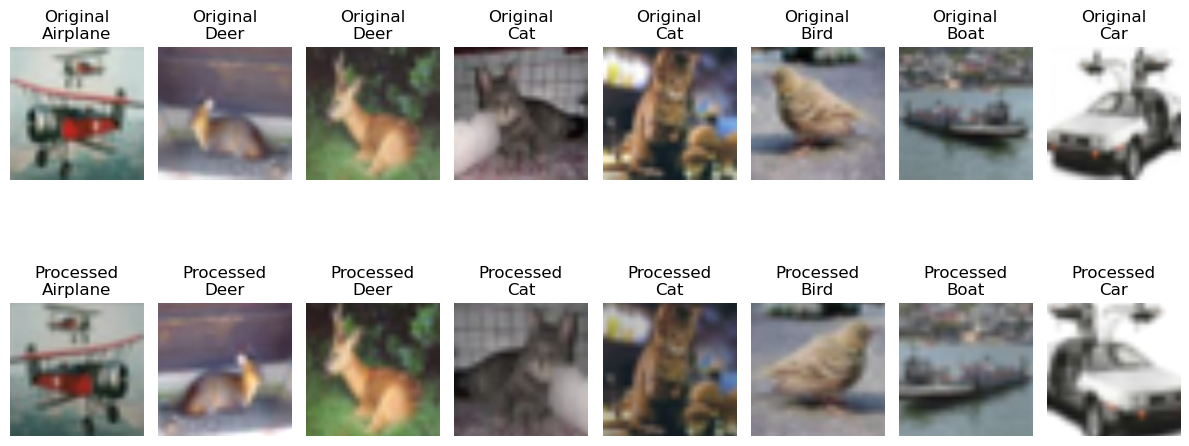

Using device: cuda

Preparing ResNet model...

Training model on training set...


Full training Epoch 1: 100%|█████████████████████████████████████████████████████████| 782/782 [01:56<00:00,  6.73it/s]


Epoch 1: Loss: 0.5793, Train Acc: 0.8008


Full training Epoch 2: 100%|█████████████████████████████████████████████████████████| 782/782 [01:56<00:00,  6.73it/s]


Epoch 2: Loss: 0.4597, Train Acc: 0.8436


Full training Epoch 3: 100%|█████████████████████████████████████████████████████████| 782/782 [01:56<00:00,  6.70it/s]


Epoch 3: Loss: 0.4091, Train Acc: 0.8609


Full training Epoch 4: 100%|█████████████████████████████████████████████████████████| 782/782 [01:56<00:00,  6.69it/s]


Epoch 4: Loss: 0.3869, Train Acc: 0.8684


Full training Epoch 5: 100%|█████████████████████████████████████████████████████████| 782/782 [01:56<00:00,  6.68it/s]


Epoch 5: Loss: 0.3508, Train Acc: 0.8804


Full training Epoch 6: 100%|█████████████████████████████████████████████████████████| 782/782 [01:56<00:00,  6.74it/s]


Epoch 6: Loss: 0.3373, Train Acc: 0.8834


Full training Epoch 7: 100%|█████████████████████████████████████████████████████████| 782/782 [01:56<00:00,  6.72it/s]


Epoch 7: Loss: 0.3117, Train Acc: 0.8928


Full training Epoch 8: 100%|█████████████████████████████████████████████████████████| 782/782 [01:56<00:00,  6.72it/s]


Epoch 8: Loss: 0.3030, Train Acc: 0.8951


Full training Epoch 9: 100%|█████████████████████████████████████████████████████████| 782/782 [01:57<00:00,  6.66it/s]


Epoch 9: Loss: 0.2827, Train Acc: 0.9023


Full training Epoch 10: 100%|████████████████████████████████████████████████████████| 782/782 [01:57<00:00,  6.63it/s]


Epoch 10: Loss: 0.2745, Train Acc: 0.9053


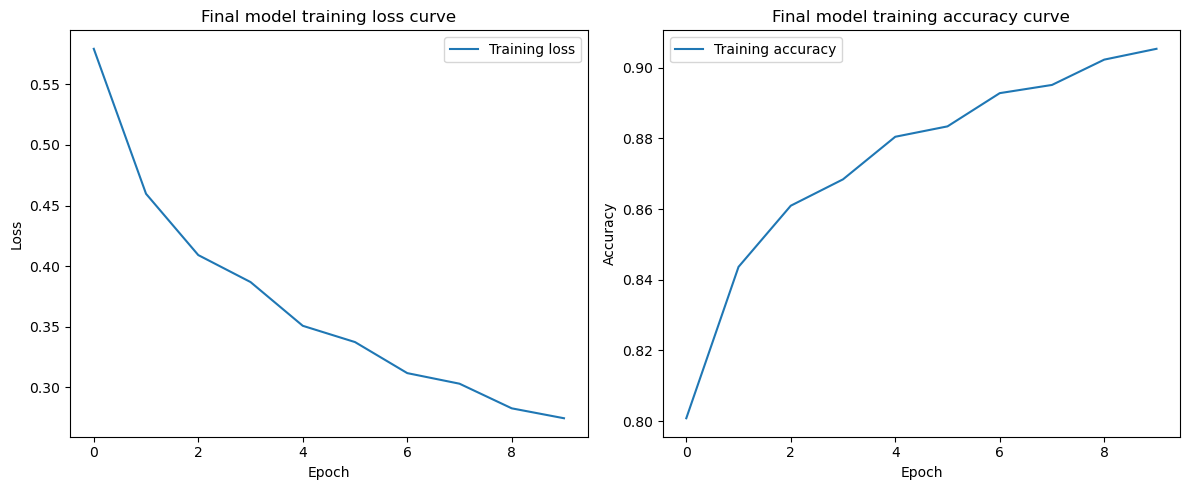

Final model saved: resnet.pth

Evaluating best model on test set...


In [ ]:
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from torchvision.models import resnet18
import numpy as np
import pandas as pd

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# 1. Data Preparation
print("Preparing data...")
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224, scale=(0.64, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load CIFAR10 dataset
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

# Split training and validation sets
n = len(train_data)
indices = torch.randperm(n)
split = int(n * 0.9)
train_subset = torch.utils.data.Subset(train_data, indices[:split])
valid_subset = torch.utils.data.Subset(train_data, indices[split:])

batch_size = 64
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_subset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

class_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Boat', 'Truck']

# Show dataset info
print("\nDataset info...")
print(f"Number of training samples: {len(train_subset)}")
print(f"Number of validation samples: {len(valid_subset)}")
print(f"Number of test samples: {len(test_data)}")
print("\nClass distribution:")

# Count training set class distribution
train_labels = [train_data.targets[i] for i in train_subset.indices]
train_class_counts = {class_name: train_labels.count(i) for i, class_name in enumerate(class_names)}
print("Training set:", train_class_counts)

# Count validation set class distribution
valid_labels = [train_data.targets[i] for i in valid_subset.indices]
valid_class_counts = {class_name: valid_labels.count(i) for i, class_name in enumerate(class_names)}
print("Validation set:", valid_class_counts)

# Count test set class distribution
test_labels = test_data.targets
test_class_counts = {class_name: test_labels.count(i) for i, class_name in enumerate(class_names)}
print("Test set:", test_class_counts)

# Show original vs processed images
def denormalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """Denormalize images for display"""
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

print("\nDisplay original vs processed images...")
# Get a batch of original and processed images
original_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

original_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=original_transform)
sample_indices = torch.randperm(len(original_data))[:8]  # Randomly select 8 samples

plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    # Original image
    original_img, label = original_data[idx]
    plt.subplot(2, 8, i+1)
    plt.imshow(original_img.permute(1, 2, 0))
    plt.title(f"Original\n{class_names[label]}")
    plt.axis('off')
    
    # Processed image
    processed_img, _ = train_data[idx]
    processed_img = denormalize(processed_img)  # Denormalize
    plt.subplot(2, 8, i+9)
    plt.imshow(processed_img.permute(1, 2, 0))
    plt.title(f"Processed\n{class_names[label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# 2. Model Preparation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ResNet model
print("\nPreparing ResNet model...")
resnet = resnet18(pretrained=True)
# Freeze all layers
for param in resnet.parameters():
    param.requires_grad = False
# Unfreeze last layers
for param in resnet.layer4.parameters():
    param.requires_grad = True
for param in resnet.fc.parameters():
    param.requires_grad = True
# Modify final fully connected layer
resnet.fc = nn.Linear(resnet.fc.in_features, 10)
resnet = resnet.to(device)

final_train_losses = []
final_train_accs = []
criterion = nn.CrossEntropyLoss()
# 3. Train model on training set
print("\nTraining model on training set...")
full_train_loader = DataLoader(
    torch.utils.data.ConcatDataset([train_loader.dataset, valid_loader.dataset]),
    batch_size=64, shuffle=True, num_workers=4, pin_memory=True
)

optimizer = optim.Adam(filter(lambda p: p.requires_grad, resnet.parameters()), lr=1e-3, weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.9)

for epoch in range(10):
    resnet.train()
    total_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in tqdm(full_train_loader, desc=f"Full training Epoch {epoch+1}"):
        inputs, labels = inputs.to(device, non_blocking=True), labels.to(device, non_blocking=True)
        
        optimizer.zero_grad(set_to_none=True)
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    
    scheduler.step()
    train_loss = total_loss / len(full_train_loader)
    train_acc = correct / total
    
    # Record final model metrics
    final_train_losses.append(train_loss)
    final_train_accs.append(train_acc)
    
    print(f"Epoch {epoch+1}: Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

# Plot final model curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(final_train_losses, label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final model training loss curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(final_train_accs, label='Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Final model training accuracy curve')
plt.legend()

plt.tight_layout()
plt.show()

# Save final model
torch.save(resnet.state_dict(), 'final_resnet.pth')
print("Final model saved: resnet.pth")

# 4. Evaluate on test set
print("\nEvaluating best model on test set...")
resnet.eval()
test_correct = 0
test_total = 0
all_preds = []
all_labels = []
all_probs = []
all_images = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = resnet(inputs)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        _, predicted = outputs.max(1)
        test_correct += predicted.eq(labels).sum().item()
        test_total += labels.size(0)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())
        all_images.extend(inputs.cpu().numpy())

test_acc = test_correct / test_total
print(f"Test Accuracy: {test_acc:.4f}")

# 5. Save prediction results
print("\nSaving prediction results...")
results = []
for i in range(len(all_preds)):
    results.append({
        'True Label': class_names[all_labels[i]],
        'Predicted Label': class_names[all_preds[i]],
        'Predicted Probability': max(all_probs[i]),
        'Correct': all_labels[i] == all_preds[i]
    })

results_df = pd.DataFrame(results)
results_df.to_csv('predictions_results.csv', index=False, encoding='utf-8-sig')
print("Prediction results saved to predictions_results.csv")

# 6. Classification report & confusion matrix
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Show confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(all_labels, all_preds), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.show()
